In [1]:
import numpy as np
import pickle
import h5py
from scipy.sparse import csr_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from evaluation import get_metric

In [2]:
def topk_values(array, topk):
    temp_mat = np.zeros(len(array))
    topk = min(topk, np.count_nonzero(array > 0))
    temp_mat[np.argpartition(array, -topk)[-topk:]] = 1
    return temp_mat

def topk_per_row(matrix, topk):
    temp_mat = np.apply_along_axis(topk_values, 1, matrix, topk)
    return temp_mat

In [3]:
depth = 20
recipe_threshold = 2000
ingred_threshold = 700
label_threshold = 10
ingred_topk = 10

In [4]:
h5f_train = h5py.File('./Container/train', 'r')
train_features = h5f_train['features_boolean'][:]
train_labels = h5f_train['labels_one_hot'][:]
h5f_train.close()

In [5]:
h5f_valid = h5py.File('./Container/valid_cpl', 'r')
valid_features = h5f_valid['features_boolean'][:]
answer = h5f_valid['labels_id'][:].astype(np.int64)
h5f_valid.close()

answer_dict = {}
for i, ans in enumerate(answer):
    answer_dict[i] = ans

In [6]:
recipe_num, ingred_num = train_features.shape
_, label_num = train_labels.shape

1 1
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.0010900691001964797	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.12985590303059755	recall: 0.2930682976554536	recall_rank: 4.113913043478261
depth:2	macro_f1: 0.0010964220869354479	micro_f1: 0.07148318042813456	acc: 0.07148318042813456	MAP: 0.12985787502224844	recall: 0.29243119266055045	recall_rank: 4.1006535947712415
depth:3	macro_f1: 0.000788669338783683	micro_f1: 0.06460244648318043	acc: 0.06460244648318043	MAP: 0.11521598870605006	recall: 0.2544597349643221	recall_rank: 3.970956434651978
depth:4	macro_f1: 0.0007888071071696981	micro_f1: 0.06460244648318043	acc: 0.06460244648318043	MAP: 0.11521811238936641	recall: 0.2545871559633027	recall_rank: 3.9744744744744747
depth:5	macro_f1: 0.0006744294138610325	micro_f1: 0.06256371049949032	acc: 0.06256371049949032	MAP: 0.10865

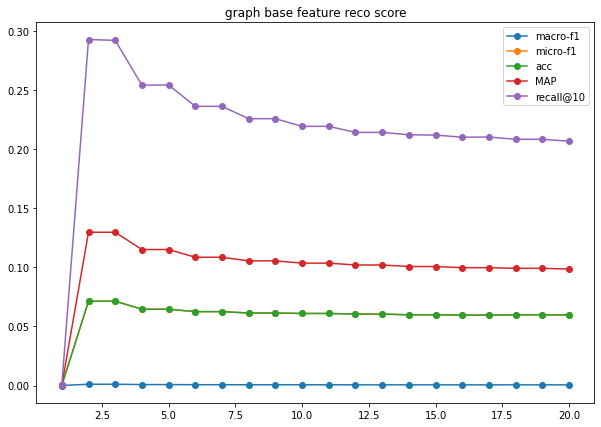

1 2
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.0010900691001964797	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.1298573188194751	recall: 0.2930682976554536	recall_rank: 4.113478260869565
depth:2	macro_f1: 0.0010969156592266322	micro_f1: 0.07148318042813456	acc: 0.07148318042813456	MAP: 0.1298764319693222	recall: 0.29268603465851173	recall_rank: 4.105790161079669
depth:3	macro_f1: 0.0008704822154746595	micro_f1: 0.06651376146788991	acc: 0.06651376146788991	MAP: 0.11851922641295765	recall: 0.2619775739041794	recall_rank: 4.006322957198444
depth:4	macro_f1: 0.0008704822154746595	micro_f1: 0.06651376146788991	acc: 0.06651376146788991	MAP: 0.11852150178793944	recall: 0.26210499490316	recall_rank: 4.0097228974234325
depth:5	macro_f1: 0.0009627095846046833	micro_f1: 0.06625891946992865	acc: 0.06625891946992865	MAP: 0.114010848

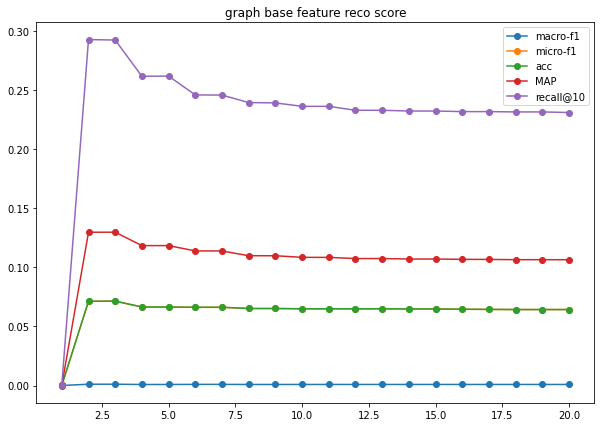

1 4
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.0010900691001964797	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.1298573188194751	recall: 0.2930682976554536	recall_rank: 4.113478260869565
depth:2	macro_f1: 0.0010894262900819941	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.12983097503357477	recall: 0.29281345565749234	recall_rank: 4.109225413402959
depth:3	macro_f1: 0.000978248943111379	micro_f1: 0.0676605504587156	acc: 0.0676605504587156	MAP: 0.11731019327540763	recall: 0.25267584097859325	recall_rank: 3.913767019667171
depth:4	macro_f1: 0.0009783346899014465	micro_f1: 0.0676605504587156	acc: 0.0676605504587156	MAP: 0.11730877748653007	recall: 0.25267584097859325	recall_rank: 3.914775592536561
depth:5	macro_f1: 0.0009385344399612455	micro_f1: 0.06689602446483181	acc: 0.06689602446483181	MAP: 0.1111044872

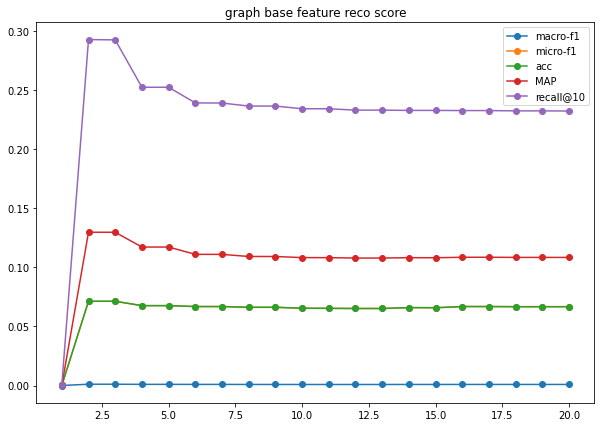

1 8
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.0010900691001964797	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.1298550434444933	recall: 0.2930682976554536	recall_rank: 4.113913043478261
depth:2	macro_f1: 0.001089381561359362	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.12983451450576866	recall: 0.2930682976554536	recall_rank: 4.114347826086957
depth:3	macro_f1: 0.0009590160281045431	micro_f1: 0.06791539245667685	acc: 0.06791539245667685	MAP: 0.1151059111208194	recall: 0.24885321100917432	recall_rank: 3.9974398361495136
depth:4	macro_f1: 0.0009590111796245922	micro_f1: 0.06791539245667685	acc: 0.06791539245667685	MAP: 0.11508270229600509	recall: 0.24872579001019368	recall_rank: 3.9943647540983607
depth:5	macro_f1: 0.0008870569211884152	micro_f1: 0.06676860346585117	acc: 0.06676860346585117	MAP: 0.110147

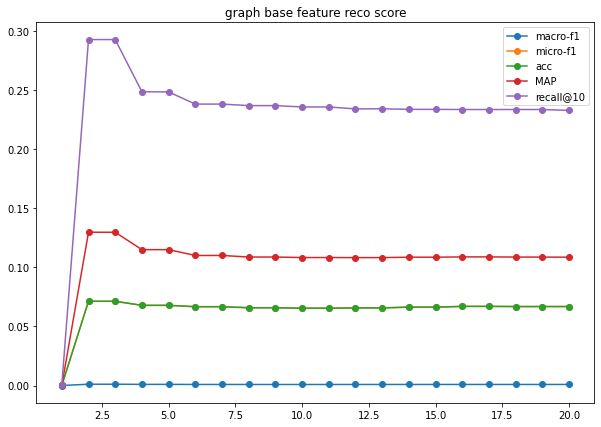

2 1
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.0010971091123420425	micro_f1: 0.07148318042813456	acc: 0.07148318042813456	MAP: 0.12988189286927854	recall: 0.292940876656473	recall_rank: 4.1122227055241405
depth:2	macro_f1: 0.0010892643947438994	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.12978865305891335	recall: 0.29281345565749234	recall_rank: 4.1096605744125325
depth:3	macro_f1: 0.0007497769745673402	micro_f1: 0.0640927624872579	acc: 0.0640927624872579	MAP: 0.11390911444428276	recall: 0.2492354740061162	recall_rank: 3.934049079754601
depth:4	macro_f1: 0.0007501034123692177	micro_f1: 0.0640927624872579	acc: 0.0640927624872579	MAP: 0.11388150656117028	recall: 0.24910805300713557	recall_rank: 3.931969309462916
depth:5	macro_f1: 0.0006256639067112811	micro_f1: 0.06154434250764526	acc: 0.06154434250764526	MAP: 0.10706594

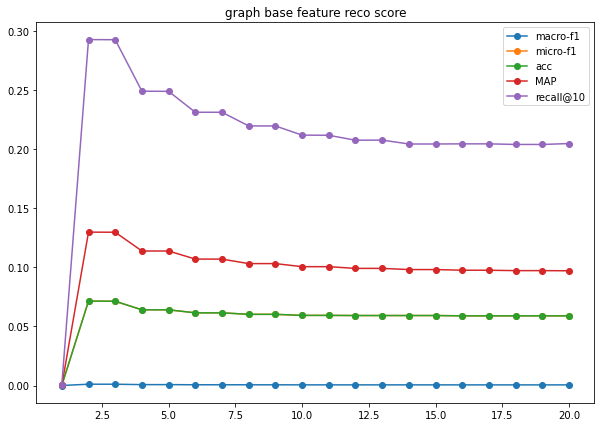

4 1
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.001089962555885583	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.1298534254000618	recall: 0.2930682976554536	recall_rank: 4.114782608695652
depth:2	macro_f1: 0.001089542780199017	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.12983931807517468	recall: 0.29281345565749234	recall_rank: 4.110095735422107
depth:3	macro_f1: 0.0007406627392888073	micro_f1: 0.06396534148827727	acc: 0.06396534148827727	MAP: 0.11366377845735653	recall: 0.24872579001019368	recall_rank: 3.9410860655737703
depth:4	macro_f1: 0.0007407028668218775	micro_f1: 0.06396534148827727	acc: 0.06396534148827727	MAP: 0.11366301999902928	recall: 0.24872579001019368	recall_rank: 3.9410860655737703
depth:5	macro_f1: 0.0006266632658440975	micro_f1: 0.06141692150866463	acc: 0.06141692150866463	MAP: 0.10684

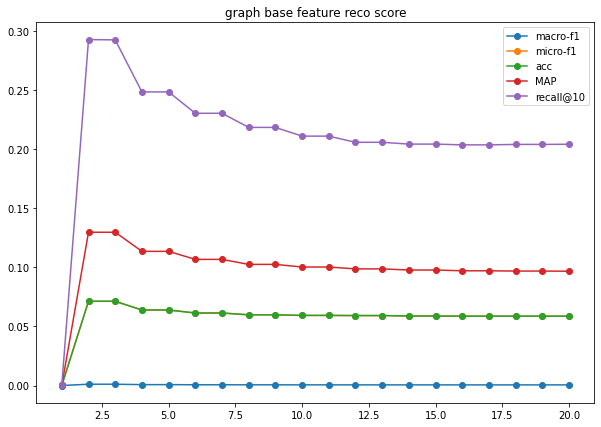

8 1
depth:0	macro_f1: 1.66651098676532e-07	micro_f1: 0.00012742099898063202	acc: 0.00012742099898063202	MAP: 0.0001656472986748216	recall: 0.0005096839959225281	recall_rank: 7.75
depth:1	macro_f1: 0.0010893519786711332	micro_f1: 0.07135575942915393	acc: 0.07135575942915393	MAP: 0.12983800341407406	recall: 0.292940876656473	recall_rank: 4.1117877337973034
depth:2	macro_f1: 0.0010972824146880508	micro_f1: 0.07148318042813456	acc: 0.07148318042813456	MAP: 0.12986829118327622	recall: 0.2930682976554536	recall_rank: 4.115652173913044
depth:3	macro_f1: 0.0007420711948912532	micro_f1: 0.06396534148827727	acc: 0.06396534148827727	MAP: 0.11362443975211568	recall: 0.24808868501529052	recall_rank: 3.928608115048793
depth:4	macro_f1: 0.0007419600631884751	micro_f1: 0.06396534148827727	acc: 0.06396534148827727	MAP: 0.11362443975211568	recall: 0.24808868501529052	recall_rank: 3.928608115048793
depth:5	macro_f1: 0.0006278488660608513	micro_f1: 0.06141692150866463	acc: 0.06141692150866463	MAP: 0.10683

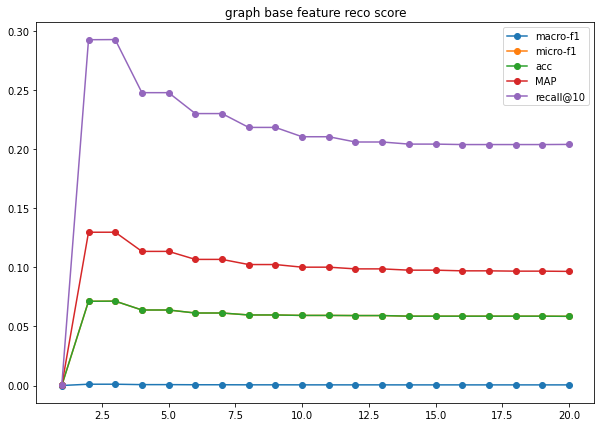

In [7]:
macro_f1_dict = {}
micro_f1_dict = {}
acc_dict = {}
MAP_dict = {}
recall10_dict = {}
recall_rank_dict = {}

for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]:
    print(w1, w2)
    adj_matrix = np.hstack([np.zeros((recipe_num, recipe_num)), w1*train_features, w2*train_labels])
    temp_matrix = np.hstack([w1*train_features.T, np.zeros((ingred_num, ingred_num)), np.zeros((ingred_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    temp_matrix = np.hstack([w2*train_labels.T, np.zeros((label_num, ingred_num)), np.zeros((label_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    adj_matrix = csr_matrix(adj_matrix)
    
    query_num, _ = valid_features.shape
    score_matrix = csr_matrix(np.hstack([np.zeros((query_num, recipe_num)), valid_features, np.zeros((query_num, label_num))]))
    src_matrix = score_matrix.copy()
    
    score_matrix = normalize(score_matrix, axis=1, norm='l1')
    exist_idx = score_matrix > 0
    
    macro_f1_lst = []
    micro_f1_lst = []
    acc_lst = []
    MAP_lst = []
    recall10_lst = []
    recall_rank_lst = []
    
    for k in range(depth):
        # start node의 누적 점수 * 인접행렬 -> next node에 더해질 값
        src_matrix = np.multiply(score_matrix.toarray(), src_matrix.toarray()) @ adj_matrix
        score_matrix = csr_matrix(score_matrix + src_matrix)
        score_matrix = normalize(score_matrix, axis=1, norm='l1')
        # next_node의 score matrix
        src_matrix = score_matrix.toarray() * (src_matrix>0)
        src_recipe_matrix = topk_per_row(src_matrix[:, :recipe_num], recipe_threshold)
        src_ingred_matrix = topk_per_row(src_matrix[:, recipe_num:recipe_num+ingred_num], ingred_threshold)
        src_label_matrix = topk_per_row(src_matrix[:, recipe_num+ingred_num:], label_threshold)
        src_matrix = csr_matrix(np.hstack([src_recipe_matrix, src_ingred_matrix, src_label_matrix]))

        score_matrix_ = score_matrix.copy()
        score_matrix_[exist_idx] = 0

        ingred_recs = {}
        ingred_rec_idx_lst = np.argpartition(score_matrix_[:, recipe_num:recipe_num+ingred_num].toarray(), -ingred_topk)[:,-ingred_topk:]
        top_recommends = np.argmax(score_matrix_[:, recipe_num:recipe_num+ingred_num].toarray(), axis=1).flatten()

        for query, ingred_rec_idx in enumerate(ingred_rec_idx_lst):
            ingred_recs[query] = []

            for idx in ingred_rec_idx:
                ingred_recs[query].append((idx, score_matrix_[query, recipe_num + idx]))

            ingred_recs[query].sort(key=lambda x : x[1], reverse=True)


        metric = get_metric(ingred_recs, answer_dict, n=10)
        MAP_lst.append(metric['map'])
        recall10_lst.append(metric['recall'])
        recall_rank_lst.append(metric['recall_rank'])
        macro_f1_lst.append(metric['macro'])
        micro_f1_lst.append(metric['micro'])
        acc_lst.append(metric['accuracy'])
        print("depth:{}\tmacro_f1: {}\tmicro_f1: {}\tacc: {}\tMAP: {}\trecall: {}\trecall_rank: {}"
              .format(k, metric['macro'], metric['micro'], metric['accuracy'], metric['map'], metric['recall'], metric['recall_rank']))
        with open("./recs/Graph_rec_cpl_{}_{}_depth_{}.pickle".format(w1,w2,k), 'wb') as f:
            pickle.dump(ingred_recs, f)
                
    macro_f1_dict[w1/w2] = macro_f1_lst
    micro_f1_dict[w1/w2] = micro_f1_lst
    acc_dict[w1/w2] = acc_lst
    MAP_dict[w1/w2] = MAP_lst
    recall10_dict[w1/w2] = recall10_lst
    recall_rank_dict[w1/w2] = recall_rank_lst
    
    depth_lst = [i for i in range(1, depth+1)]

    plt.figure(figsize=(10,7))
    plt.plot(depth_lst, macro_f1_lst, 'o-', label='macro-f1')
    plt.plot(depth_lst, micro_f1_lst, 'o-', label='micro-f1')
    plt.plot(depth_lst, acc_lst, 'o-', label='acc')
    plt.plot(depth_lst, MAP_lst, 'o-', label='MAP')
    plt.plot(depth_lst, recall10_lst, 'o-', label='recall@10')
    plt.title("graph base feature reco score")
    plt.legend()
    plt.savefig('./data_analysis/graph_cpl_scores_{}_{}.png'.format(w1,w2), dpi=100)
    plt.show()

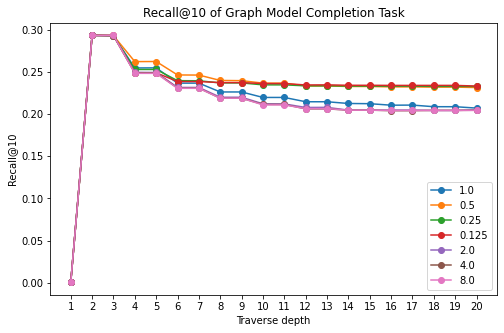

In [8]:
ratio_lst = [w1/w2 for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]]

plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall10_dict[ratio], 'o-', label=str(ratio))
plt.title("Recall@10 of Graph Model Completion Task")
plt.xlabel('Traverse depth')
plt.ylabel('Recall@10')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_cpl_recall10.png', dpi=100)
plt.show()

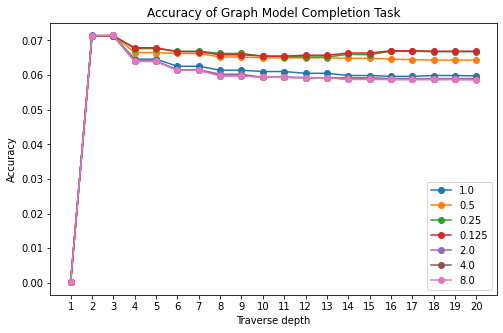

In [9]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, acc_dict[ratio], 'o-', label=str(ratio))
plt.title("Accuracy of Graph Model Completion Task")
plt.xlabel('Traverse depth')
plt.ylabel('Accuracy')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_cpl_acc.png', dpi=100)
plt.show()

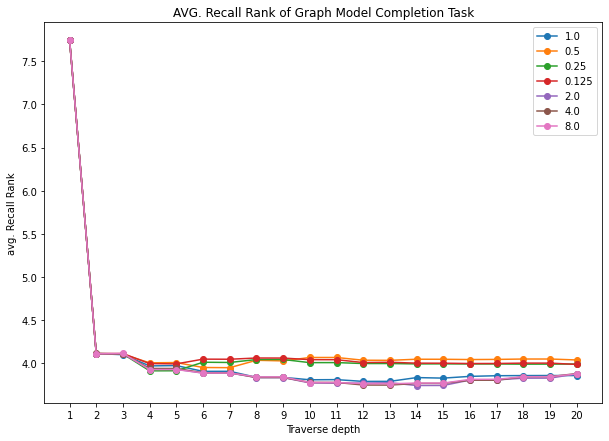

In [10]:
plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall_rank_dict[ratio], 'o-', label=str(ratio))
plt.title("AVG. Recall Rank of Graph Model Completion Task")
plt.xlabel('Traverse depth')
plt.ylabel('avg. Recall Rank')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_cpl_recall_rank.png', dpi=100)
plt.show()

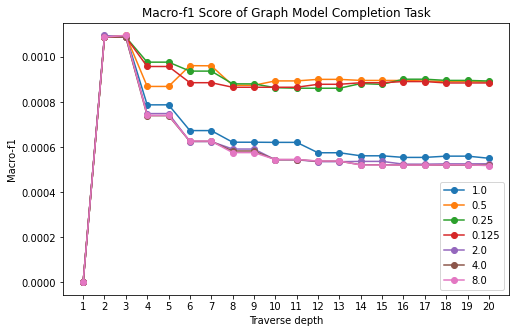

In [11]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, macro_f1_dict[ratio], 'o-', label=str(ratio))
plt.title("Macro-f1 Score of Graph Model Completion Task")
plt.xlabel('Traverse depth')
plt.ylabel('Macro-f1')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_cpl_macro.png', dpi=100)
plt.show()

In [12]:
for ratio in ratio_lst:
    print(ratio, np.mean(macro_f1_dict[ratio]))

1.0 0.0006332023409004982
0.5 0.0008729724961345283
0.25 0.0008743264627284087
0.125 0.0008657417659643779
2.0 0.0005995743588988236
4.0 0.0005950596514865223
8.0 0.0005949939335202323


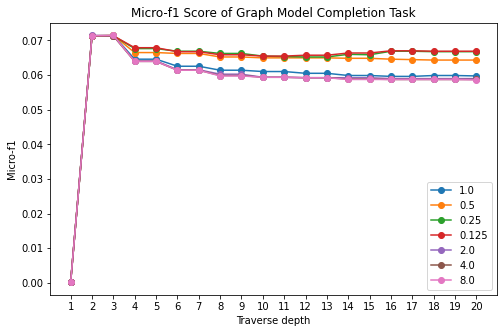

In [13]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, micro_f1_dict[ratio], 'o-', label=str(ratio))
plt.title("Micro-f1 Score of Graph Model Completion Task")
plt.xlabel('Traverse depth')
plt.ylabel('Micro-f1')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_cpl_micro.png', dpi=100)
plt.show()

In [6]:
macro_f1_dict = {}
micro_f1_dict = {}
acc_dict = {}
MAP_dict = {}
recall10_dict = {}
recall_rank_dict = {}

for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]:   
    macro_f1_lst = []
    micro_f1_lst = []
    acc_lst = []
    MAP_lst = []
    recall10_lst = []
    recall_rank_lst = []
    
    for k in range(depth):
        with open("./recs/Graph_rec_cpl_{}_{}_depth_{}.pickle".format(w1,w2,k), 'rb') as f:
            ingred_recs = pickle.load(f)
        metric = get_metric(ingred_recs, answer_dict, n=10)
        MAP_lst.append(metric['map'])
        recall10_lst.append(metric['recall'])
        recall_rank_lst.append(metric['recall_rank'])
        macro_f1_lst.append(metric['macro'])
        micro_f1_lst.append(metric['micro'])
        acc_lst.append(metric['accuracy'])
                
    macro_f1_dict[w1/w2] = macro_f1_lst
    micro_f1_dict[w1/w2] = micro_f1_lst
    acc_dict[w1/w2] = acc_lst
    MAP_dict[w1/w2] = MAP_lst
    recall10_dict[w1/w2] = recall10_lst
    recall_rank_dict[w1/w2] = recall_rank_lst
    
    depth_lst = [i for i in range(1, depth+1)]

In [13]:
for ratio in ratio_lst:
    print(ratio, np.max(macro_f1_dict[ratio]))

1.0 0.0010971729859249515
0.5 0.0010969806669168059
0.25 0.0010901378683250262
0.125 0.0010901310426972182
2.0 0.0010969442406549262
4.0 0.001090445872639706
8.0 0.0010980340639590396


In [20]:
for ratio in ratio_lst:
    print(ratio, np.max(micro_f1_dict[ratio]))

1.0 0.07148318042813456
0.5 0.07148318042813456
0.25 0.07135575942915393
0.125 0.07135575942915393
2.0 0.07148318042813456
4.0 0.07135575942915393
8.0 0.07148318042813456


In [21]:
for ratio in ratio_lst:
    print(ratio, np.mean(micro_f1_dict[ratio]))

1.0 0.059072375127420994
0.5 0.06253185524974515
0.25 0.06358944954128441
0.125 0.0636913863404689
2.0 0.058269622833843016
4.0 0.05809760448521917
8.0 0.05807212028542304
